In [1]:
# startup
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
import babysmurf as bs

In [2]:
plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=24) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend

(-100972.5910458626-58116.130661649804j)


Text(0.5, 0.98, 'resonance circle vs ideal before/after calibration')

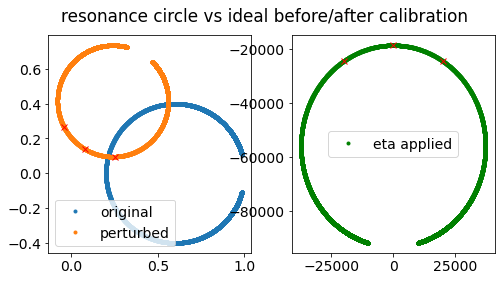

In [3]:
fres = 5.5e9 # 5.5GHz
Qtot = 4.e4 # aim for bandwidth of 100kHz
Qc = 5.e4 # all real for now, not asymmetric
offset = 20.e3

fvec = np.linspace(fres-500.e3,fres+500.e3,int(1e4)) # 1kHz spacing on fvec

a,p = bs.make_res_s21(fres,fvec,Qtot,Qc)
delay = 60 # degrees
scalefac = 0.8
p2 = np.deg2rad(delay) + p
a2 = scalefac * a # multiplication by scale factor in amplitude equivalent to shifting up/down in logmag space

eta = bs.estimate_eta(fvec,a2,p2,offset=offset)
print(eta)

fres_est,fres_idx = bs.estimate_res_freq(fvec,a2,p2)
fp_idx = np.where(np.abs(fvec-(fres_est+offset)) == np.min(np.abs(fvec-(fres_est+offset))))[0][0]
fn_idx = np.where(np.abs(fvec-(fres_est-offset)) == np.min(np.abs(fvec-(fres_est-offset))))[0][0]
index_array = np.asarray([fn_idx,fres_idx,fp_idx])

ivec = a*np.cos(p)
qvec = a*np.sin(p)
ivec2 = a2*np.cos(p2)
qvec2 = a2*np.sin(p2)

s21 = ivec2 + 1j*qvec2
eta = bs.estimate_eta(fvec,a2,p2,offset=offset)
s21_new = s21 * eta
ivec_eta = np.real(s21_new)
qvec_eta = np.imag(s21_new)

fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(ivec,qvec,'.',label='original')
ax[0].plot(ivec2,qvec2,'.',label='perturbed')
ax[0].plot(ivec2[index_array],qvec2[index_array],'rx')
ax[0].legend()
ax[1].plot(ivec_eta,qvec_eta,'g.',label='eta applied')
ax[1].plot(ivec_eta[index_array],qvec_eta[index_array],'rx')
#ax[1].set_xlim([0,1.e5])
#ax[1].set_ylim([-2.e4,8.e4])
ax[1].legend()
plt.suptitle('resonance circle vs ideal before/after calibration')

In [4]:
probe_f = fres + 1.e3

fest = bs.estimate_freq_error(fvec,a2,p2,eta,probe_f)
print(f"actual frequency error = {np.abs(fres - probe_f) * 1e-3} kHz")
print(f"estimated frequency error = {fest * 1e-3} kHz")

actual frequency error = 1.0 kHz
estimated frequency error = 1.0592837012548353 kHz
